In [31]:
#Defining the classification model
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier()

In [33]:
#Finding the predicted probability of the target variable
Y_predict_proba=lgb.predict_proba(X_test)[:,1]

In [49]:
def threshold_evaluation(Y_test,Y_prob,step_size=0,threshold=0,print_def='True'):
 
    '''
    Docstring : Computes Evaluation metrics split table using different thresholds values.By default computes split 
    table for a list of 11 threshold values unless a discrete threshold value or a stepsize is passed and prints the 
    metrics definition
    
    Parameters
    ----------
    Y_test : Series 
    The actual target value in the test sample
    
    Y_prob : Series
    The predicted probability value of the test sample for category 1
    
    threshold : float , default "List"
    The cut-off probability for classifying the predicted value as 0 or 1  
    
    step_size : int , default 11
    The number of thresholds for plotting the ROC Curve.
    
    print_def : boolean , default 'TRUE'
    Displays the metrics of the split table used in Model evaluation
    
    Returns
    -------
    
    DataFrame
    Split value tabulation of the evaluation metrics using different threshold value.
    
    '''
    
    
    if step_size!=0:
    
        step=step_size

    else :
    
        step=11
    
    if threshold!=0:
    
        threshold_list=[]
    
        threshold_list.append(threshold)

    else :
    
        threshold_list=np.linspace(start = 0, stop = 1, num = step)  
        
    
    # converting the predicted value into binary class based on a threshold value
    
    result=[]
    
    Y_probability=pd.Series(Y_prob)
        
    for j in threshold_list:
    
        y_predict = Y_probability.map(lambda x: 1 if x > j else 0)

    
    # Calculating the evaluation metrics

        tn, fp, fn, tp = confusion_matrix(Y_test,y_predict,labels=[1,0]).ravel()

        
        TPR = tp / (tp + fn)
    
        FPR = fp / (fp + tn)
    
        FNR = fn / (fn + tp)
    
        TNR = tn / (tn + fp) 

        
        if tp == fp == 0:
        
            PPV = 0
        
            FDR = 0
        
        else:
        
            PPV = tp / (tp + fp)
            
            FDR = fp / (tp + fp)
        
        
        if tn == fn == 0:
        
            NPV = 0
        
            FOR = 0
        
        else:
        
            NPV = tn / (tn + fn)
            
            FOR = fn / (tn + fn)
    
            
        if PPV == TPR == 0:
        
            f1 = 0
        
        else:
        
            f1 = 2 * (PPV * TPR) / (PPV + TPR)

        result.append([ j, tp, tn, fp, fn, PPV, TPR, f1, NPV, FPR, TNR, FNR, FDR, FOR])
    
    result=pd.DataFrame(result)
    
    result.columns=["threshold","TP", "TN", "FP", "FN","PRECISION", "RECALL", "F1_SCORE","NPV","FALL_OUT","SPECIFICITY","MISS_RATE","FDR","FOR"]

    start = "\033[1m" 
    
    end = "\033[0;0m"
    
    print(start + '\n The Evaluation Metrics Split Table : \n' + end)
    
    display_all(result)
    
    #print(result.head(len(result)))
    
    
    # Printing the metrics definition
    
    if print_def=='True':
   
        print(start + '\n\n Metrics Defition : \n' + end)
    
        print('\n TP : true positive is an outcome where the model correctly predicts the positive class')
    
        print('\n TN : true negative is an outcome where the model correctly predicts the negative class')
    
        print('\n FP or Type I error : false positive is an outcome where the model incorrectly predicts the positive class')
    
        print('\n FN or Type II error : false negative is an outcome where the model incorrectly predicts the negative class')
    
        print('\n Precision or Positive Predictive Value : Precision is the percentage of your results which are relevant . It quantifies the number of correct positive predictions made')
    
        print('\n Recall or True Positive Rate or Sensitivity or Hit Rate : Recall refers to the percentage of total relevant results correctly classified by your algorithm . It quantifies the number of correct positive predictions made out of all positive predictions that could have been made,an indication of missed positive predictions')
    
        print('\n F1 Score or F measure : F Score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases . It is used when the False Negatives and False Positives are crucial')
    
        print('\n False Positive rate or Fall-Out : Fall-Out is the proportion of negative cases incorrectly identified as positive cases in the data i.e. the probability that false alerts will be raised')      
    
        print('\n True Negative rate or Specificity or Selectivity : Specificity is the measure of the proportion of negatives that are correctly identified')
    
        print('\n False Negative rate or Miss-Rate : Miss-Rate is the measure of the proportion of negatives that are correctly identified') 
    
        print('\n Negative Predictive Value or NPV: The proportion of predicted negatives which are real negatives')
    
        print('\n False Discovery rate or FDR: The percentage of your results which are misclassified as positives . It quantifies the number of incorrect positive predictions made')
    
        print('\n False Omission rate or FOR: The percentage of your results which are misclassified as negatives . It quantifies the number of incorrect negative predictions made')
    
        print('\n ROC AUC Score : The area under the ROC Curve.An area above 0.7 or 0.8 is considered as good\n\n\n')
    
    
    
    # Plotting the ROC Curve using inbuilt function
    
    figsize(10, 8)
    false_positive_rate, recall, thresholds = roc_curve(Y_test,Y_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.title('Receiver Operating Characteristic (ROC) calculated using inbuit function',size=14)
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall or TPR', size = 16)
    plt.xlabel('Fall-out or FPR', size = 16)
    plt.show()

    print(start + '\nThe AUC Score or Area Under the ROC Curve is:' + end,roc_auc)
    print('\n\n')
    
    
    # Plotting the ROC Curve by manual threhold input
    
    figsize(10, 8)
    plt.style.use('seaborn-dark-palette')
    thresholds = [round(t,2) for t in result['threshold']]
    plt.plot(result['FALL_OUT'], result['RECALL'], 'bo-', label = 'model')
    plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive classifier')
    for x, y, s in zip(result['FALL_OUT'], result['RECALL'], thresholds):
        plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14})

    plt.legend(prop={'size':14})
    plt.ylabel('Recall or TPR', size = 16)
    plt.xlabel('Fall-out or FPR', size = 16)
    plt.title('Receiver Operating Characteristic Curve caculated by manual threshold input', size = 14)
    plt.show()
    
   
    # Finding optimal threshold
    
    
    optimal_idx = np.argmax(result['RECALL'] - result['FALL_OUT'])
    optimal_threshold = result.iloc[optimal_idx]['threshold']
    print(start + '\n\n The Optimal threhold for the ROC is : ' + end,optimal_threshold)
    print('\n\n')
    
    
    
    return(result)



 The Evaluation Metrics Split Table : 



,threshold,TP,TN,FP,FN,PRECISION,RECALL,F1_SCORE,NPV,FALL_OUT,SPECIFICITY,MISS_RATE,FDR,FOR
0,0.0,0,1446,0,38554,0.000000,0.000000,0.000000,0.036150,0.000000,1.000000,1.000000,0.000000,0.963850
1,0.1,37152,923,523,1402,0.986118,0.963635,0.974747,0.396989,0.361687,0.638313,0.036365,0.013882,0.603011
2,0.2,38096,751,695,458,0.982083,0.988121,0.985093,0.621175,0.480636,0.519364,0.011879,0.017917,0.378825
3,0.3,38329,662,784,225,0.979956,0.994164,0.987009,0.746336,0.542185,0.457815,0.005836,0.020044,0.253664
4,0.4,38424,583,863,130,0.978033,0.996628,0.987243,0.817672,0.596819,0.403181,0.003372,0.021967,0.182328
5,0.5,38469,511,935,85,0.976271,0.997795,0.986916,0.857383,0.646611,0.353389,0.002205,0.023729,0.142617
6,0.6,38493,455,991,61,0.974901,0.998418,0.986519,0.881783,0.685339,0.314661,0.001582,0.025099,0.118217
7,0.7,38512,396,1050,42,0.973459,0.998911,0.986021,0.904110,0.726141,0.273859,0.001089,0.026541,0.095890
8,0.8,38528,334,1112,26,0.971948,0.999326,0.985446,0.927778,0.769018,0.230982,0.000674,0.028052,0.072222
9,0.9,38546,249,1197,8,0.969881,0.999792,0.984610,0.968872,0.827801,0.172199,0.000208,0.030119,0.031128




 Metrics Defition : 


 TP : true positive is an outcome where the model correctly predicts the positive class

 TN : true negative is an outcome where the model correctly predicts the negative class

 FP or Type I error : false positive is an outcome where the model incorrectly predicts the positive class

 FN or Type II error : false negative is an outcome where the model incorrectly predicts the negative class

 Precision or Positive Predictive Value : Precision is the percentage of your results which are relevant . It quantifies the number of correct positive predictions made

 Recall or True Positive Rate or Sensitivity or Hit Rate : Recall refers to the percentage of total relevant results correctly classified by your algorithm . It quantifies the number of correct positive predictions made out of all positive predictions that could have been made,an indication of missed positive predictions

 F1 Score or F measure : F Score is the harmonic mean of Precision and Recall and give

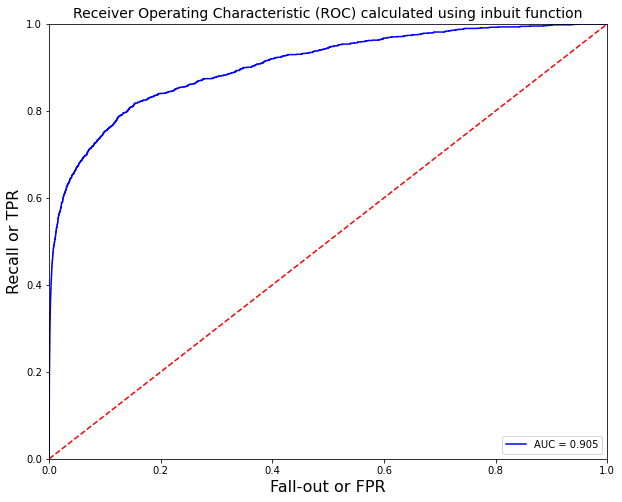


The AUC Score or Area Under the ROC Curve is: 0.9048347144143212





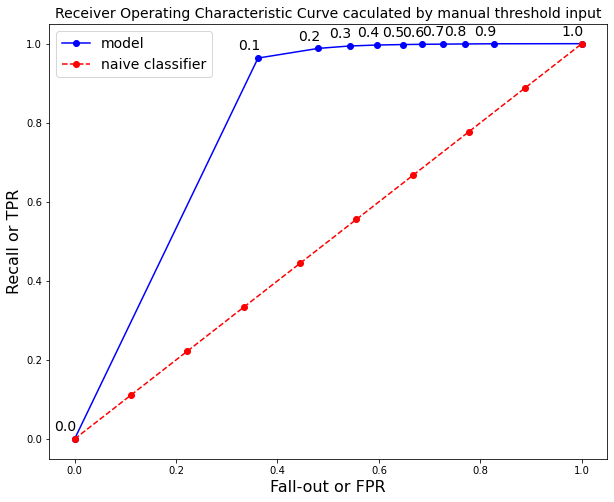



 The Optimal threhold for the ROC is :  0.1





In [50]:
roc=threshold_evaluation(y_test,Y_predict_proba)